In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from datetime import datetime,timedelta
from sklearn import linear_model
from scipy.optimize import curve_fit

In [71]:

df= pd.read_csv('owid-covid-data.csv')
df = df[df['location'].isin(['Switzerland'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']

df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df=df.fillna(0)
df

,date,total_cases
50928,-1,0.0
50929,0,0.0
50930,1,0.0
50931,2,0.0
50932,3,0.0
...,...,...
51253,324,284560.0
51254,325,289483.0
51255,326,289483.0
51256,327,289483.0


<AxesSubplot:xlabel='date'>

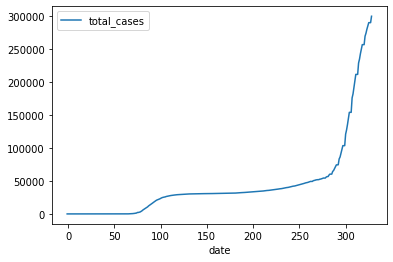

In [72]:
df.plot(x ='date', y='total_cases')

In [77]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
#z  = list(df.iloc [:, 2]) # Numero de recuperados
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestros modelos
regr.fit(np.array(x).reshape(-1, 1) ,y)

#regr.fit(np.array(x).reshape(-1, 1) ,z)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [458.49155723]
Independent term: 
 -30750.37869819322


# Modelo Lineal

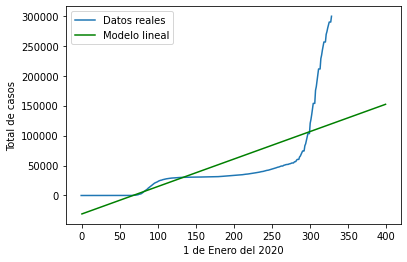

In [91]:
mp.rc('font', size=10)
mp.plot(x, y, label="Datos reales")
x_real = np.array(range(0, 400))
mp.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green', label="Modelo lineal")
mp.legend()
mp.xlabel("1 de Enero del 2020")
mp.ylabel("Total de casos")
mp.show()

# Modelo Exponencial 

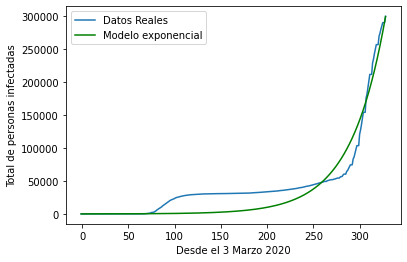

In [83]:
x1 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y1 = np.array(y, dtype=float)

def modelo_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return a * np.exp(b * x) 

popt1, pcov1 = curve_fit(modelo_exponencial, x1, y1, p0=(0,0.1))
popt1
mp.rc('font', size=10)
mp.plot(x1, y1, label="Datos Reales")
mp.plot(x1, modelo_exponencial(x1, *popt1), color='green', label="Modelo exponencial")
mp.legend()
mp.ylabel("Total de casos")
mp.show()

# Modelo Polinómico 

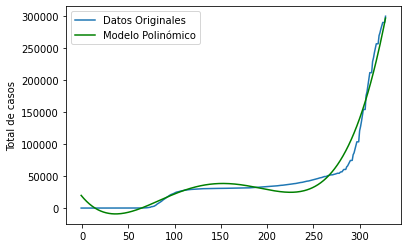

In [94]:
x2 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y2 = np.array(y, dtype=float)

def modelo_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt2, pcov2 = curve_fit(modelo_polinomial, x2, y2)
popt2
mp.rc('font', size=10)
mp.plot(x2, y2, label="Datos Originales")
mp.plot(x2, modelo_polinomial(x2, *popt2), label="Modelo Polinómico", color = 'green')
mp.legend()
mp.ylabel("Total de casos")
mp.show()

# Modelo Probalístico 

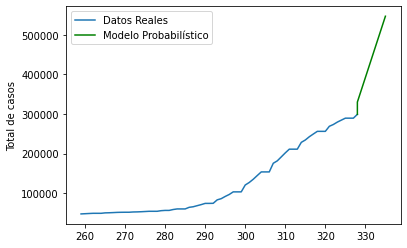

In [93]:
filtro = df["total_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
x4, y4 = [x[-1]], [y[-1]]
for i in range(x[-1], x[-1] + 8):
    x4.append(i)
    y4.append(int(y4[-1] + mediana))
mp.plot(x[260:], y[260:], label="Datos Reales")
mp.plot(x4, y4, label="Modelo Probabilístico", color="green")
mp.legend()
mp.ylabel("Total de casos")
mp.show()

<ipython-input-96-7c6906dcbe29>:5: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(x)
<ipython-input-96-7c6906dcbe29>:5: RuntimeWarning: invalid value encountered in log
  return a + b * np.log(x)
D:\Users\leand\anaconda3\envs\ia2\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-96-7c6906dcbe29>:5: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(x)
<ipython-input-96-7c6906dcbe29>:5: RuntimeWarning: invalid value encountered in log
  return a + b * np.log(x)


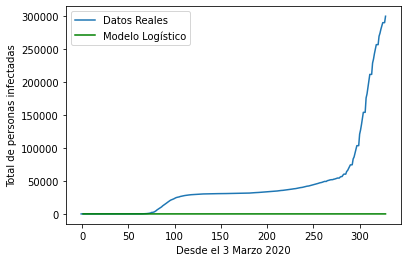

In [96]:
x3 = np.array(x, dtype=float) 
y3 = np.array(y, dtype=float)

def modelo_logistico(x, a, b):
    return a + b * np.log(x)

popt3, pcov2 = curve_fit(modelo_logistico, x3, y3) 
popt2
mp.rc('font', size=10)
mp.plot(x3, y3, label="Datos Reales")
mp.plot(x3, modelo_logistico(x3, *popt3), label="Modelo Logístico", color="green")
mp.legend()
mp.xlabel("Desde el 3 Marzo 2020")
mp.ylabel("Total de personas infectadas")
mp.show()

# Predicciones con cada uno de los modelos

In [102]:
lineal = regr.predict([[334]])
exponencial = modelo_exponencial(334, *popt1)
polinomica = modelo_polinomial(334, *popt2)
logistica = modelo_logistico(334, *popt3) 
probabilistica = int(y4[-1] + mediana)

In [103]:

# matriz de resultados
data = [[lineal,exponencial, polinomica, logistica, probabilistica]] 
  
# Create the pandas DataFrame 
resultados = pd.DataFrame(data, columns = ['Lineal', 'Exponencial', 'Polinomico', 'Logistico', 'Probabilistico']) 
resultados

,Lineal,Exponencial,Polinomico,Logistico,Probabilistico
0,[122385.80141699272],350024.372386,342759.262688,6.811141,577901
